<a href="https://colab.research.google.com/github/zulfa755/Task-Tracker-CLI/blob/main/UTS_Penambangan_Data_dan_Analisis_Bisnis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Memanggil Dataset

In [2]:
file_path = '/content/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)
print(titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## 1. Eksplorasi Awal
a. Berapa jumlah total penumpang dalam data

In [3]:
total_penumpang = titanic_data.shape[0]
print("Jumlah total penumpang:", total_penumpang)

Jumlah total penumpang: 891


b. Hitung jumlah penumpang yang selamat dam tidak selamat? Tampilkan dalam bentuk tabel dan grafik

Jumlah penumpang yang selamat dan tidak selamat:
Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


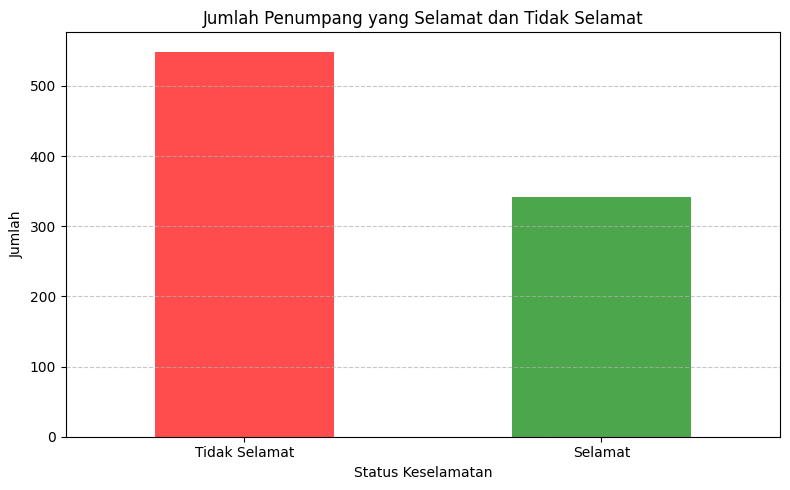

In [4]:
jumlah_selamat = titanic_data['Survived'].value_counts()
tabel_selamat = jumlah_selamat.rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
print("Jumlah penumpang yang selamat dan tidak selamat:")
print(tabel_selamat)
plt.figure(figsize=(8, 5))
jumlah_selamat.plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Jumlah Penumpang yang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah')
plt.xlabel('Status Keselamatan')
plt.xticks(ticks=[0, 1], labels=['Tidak Selamat', 'Selamat'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua

In [5]:
rata_rata_umur = titanic_data['Age'].mean()
penumpang_termuda = titanic_data[titanic_data['Age'] == titanic_data['Age'].min()] # Filter rows where Age is equal to the minimum age
penumpang_tertua = titanic_data[titanic_data['Age'] == titanic_data['Age'].max()]  # Filter rows where Age is equal to the maximum age
print("Rata-rata umur penumpang:", rata_rata_umur)
print("Penumpang Termuda:")
print(penumpang_termuda)
print("Penumpang Tertua:")
print(penumpang_tertua)

Rata-rata umur penumpang: 29.69911764705882
Penumpang Termuda:
     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C  
Penumpang Tertua:
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S  


d. Hitung jumlah penumpang berdasarkan jenis kelamin

In [6]:
jumlah_gender = titanic_data['Sex'].value_counts()
print("Jumlah penumpang berdasarkan jenis kelamin:")
print(jumlah_gender)


Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


penumpang yang banyak berjenis kelamin laki=laki dengan jumlah 577

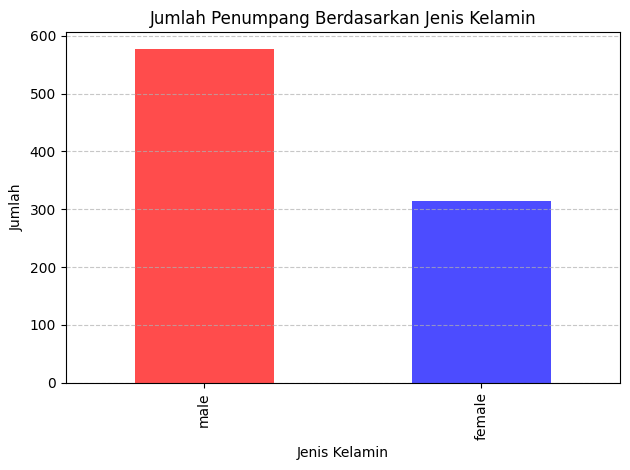

In [7]:
jumlah_gender.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

e. Tampilkan jumlah penumpang berdasarkan kelas(Pclass) dan berapa persen dari total data yang berada di kelas 1? visualisasikan

In [8]:
jumlah_kelas = titanic_data['Pclass'].value_counts()
persentase_kelas_1 = (jumlah_kelas[1] / jumlah_kelas.sum()) * 100
print("Jumlah penumpang berdasarkan kelas:")
print(jumlah_kelas)
print("Persentase penumpang kelas 1:", persentase_kelas_1, "%")

Jumlah penumpang berdasarkan kelas:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Persentase penumpang kelas 1: 24.242424242424242 %


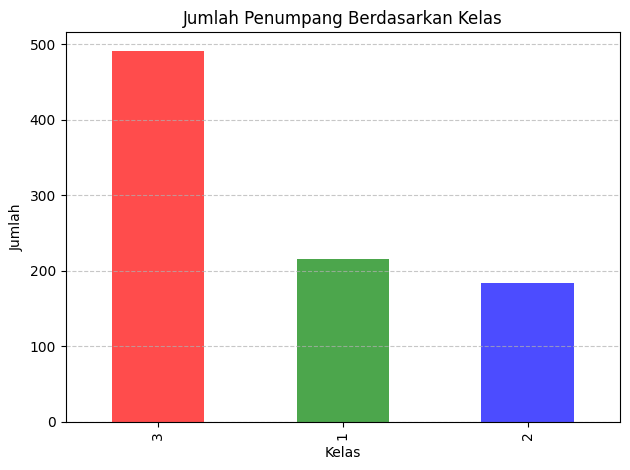

In [9]:
jumlah_kelas.plot(kind='bar', color=['red', 'green', 'blue'], alpha=0.7)
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.ylabel('Jumlah')
plt.xlabel('Kelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2. Prepocessing
a. apakah terdapat missing value pada data tersebut

In [10]:
nilai_hilang= titanic_data.isnull().sum()
print(nilai_hilang)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


b. jika ya, apa yang anda lakukan?

In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
print(titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

Imputasi nilai hilang dengan nilai rata-rata (untuk numerik).

Gunakan mode  (untuk kategorikal).

c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier

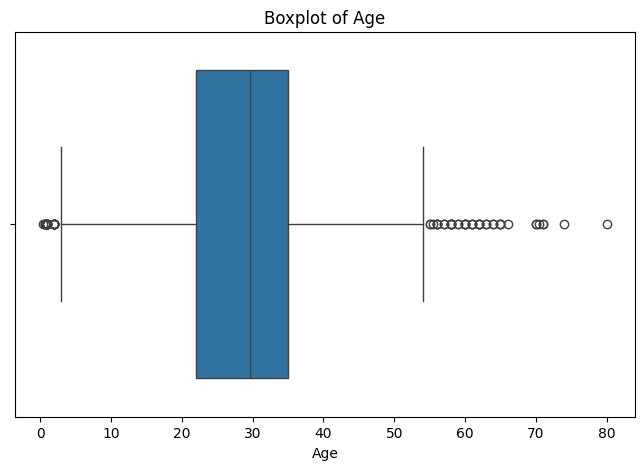

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=titanic_data['Age'])
plt.title('Boxplot of Age')
plt.show()

ya, terdapat outlier Outlier terlihat di sisi kanan grafik (pada nilai usia yang lebih besar dari sekitar 60 tahun). Ini ditandai oleh titik-titik individu yang berada di luar whisker (garis horizontal yang mewakili batas outlier).

Outlier adalah nilai yang secara signifikan berbeda dari data lainnya, yang dapat disebabkan oleh kesalahan pengukuran, variasi alami, atau pengamatan unik.

d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

tidak perlu diatasi karena outlier tidak mempengaruhi model

e. jika dibutuhkan silahkan lakukan transformasi/ standarisasi/ scalling terhadap data tersebut?

In [13]:
titanic_data['Fare'] = (titanic_data['Fare'] - titanic_data['Fare'].mean()) / titanic_data['Fare'].std()
print(titanic_data['Fare'].head())

0   -0.502163
1    0.786404
2   -0.488580
3    0.420494
4   -0.486064
Name: Fare, dtype: float64


Scaling pada data Titanic diperlukan untuk memastikan semua fitur memiliki skala yang seimbang, terutama fitur "Fare" yang memiliki rentang nilai besar dan distribusi skewed. Ketidakseimbangan skala ini dapat memengaruhi algoritma berbasis jarak, seperti KNN atau SVM, dan model berbasis optimasi, seperti Regresi Logistik, karena fitur dengan nilai besar cenderung mendominasi.

## 3. Modelling
a. Jelaskan proses pembagian dtaa menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut

In [14]:
# Memisahkan fitur (X) dan target (y)
X = titanic_data[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]  # Contoh fitur
y = titanic_data['Survived']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Data dibagi menjadi training dan testing untuk menghindari overfitting dan menguji kemampuan model pada data baru. Training digunakan untuk melatih model, sedangkan testing mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Ini memastikan model dapat menggeneralisasi dengan baik pada data nyata

b. berapa persen pembagiannya? mengapa memilih membagi dengan proporsi tersebut?

In [15]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Proporsi Data Training: {len(X_train) / len(X) * 100:.2f}%")
print(f"Proporsi Data Testing: {len(X_test) / len(X) * 100:.2f}%")


Proporsi Data Training: 79.91%
Proporsi Data Testing: 20.09%


80% Training: Cukup untuk melatih model agar mengenali pola dalam data.

20% Testing: Memastikan evaluasi representatif tanpa mengurangi data pelatihan.

Keseimbangan Optimal: Proporsi ini sering digunakan karena memberikan hasil pelatihan dan evaluasi yang seimbang.

c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. jelaskan masing-masing metode dan cara kerjanya

1. logistic Regression
Cara Kerja: Menggunakan fungsi sigmoid untuk memprediksi probabilitas kategori target (selamat atau tidak).

In [16]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       110
           1       0.62      0.41      0.49        69

    accuracy                           0.68       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.67      0.68      0.66       179

Accuracy: 0.6759776536312849


2. Random Forest
Cara Kerja: Kombinasi dari banyak pohon keputusan yang diacak untuk meningkatkan akurasi dan mengurangi overfitting.

In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       110
           1       0.49      0.51      0.50        69

    accuracy                           0.61       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.61      0.61       179

Accuracy: 0.6089385474860335


3. K-Nearest Neighbors (KNN)
Cara Kerja: Memprediksi kategori berdasarkan mayoritas tetangga terdekat dalam ruang fitur.

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_knn = knn.predict(X_test)

# Evaluasi model
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       110
           1       0.51      0.42      0.46        69

    accuracy                           0.62       179
   macro avg       0.59      0.58      0.58       179
weighted avg       0.61      0.62      0.61       179

Accuracy: 0.6201117318435754


d. Berapa nilai evaluasi dari masing-masing model dari pada uji data? apa arti masing-masing metrik evaluasi tersebut?

In [21]:

# Logistic Regression
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Random Forest
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# KNN
print("KNN:\n", classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       110
           1       0.62      0.41      0.49        69

    accuracy                           0.68       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.67      0.68      0.66       179

Accuracy: 0.6759776536312849
Random Forest:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       110
           1       0.49      0.51      0.50        69

    accuracy                           0.61       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.61      0.61       179

Accuracy: 0.6089385474860335
KNN:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       110
           1       0.51      0.42      0.46        69

    accuracy                           0.62       179
   macro avg       0.59   

Metrik Evaluasi:

Accuracy: Proporsi prediksi benar dari semua prediksi.

Precision: Kemampuan model memprediksi dengan benar kategori positif.

Recall: Kemampuan model menangkap semua kategori positif.

F1-Score: Harmoni antara precision dan recall.

e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik

In [23]:
# Logistic Regression Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)

# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Comparison Table
results = {
    "Algorithm": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy (%)": [accuracy_logreg * 100, accuracy_knn * 100, accuracy_rf * 100],
    "Precision (Selamat)": [
        report_logreg["1"]["precision"],
        report_knn["1"]["precision"],
        report_rf["1"]["precision"],
    ],
    "Recall (Selamat)": [
        report_logreg["1"]["recall"],
        report_knn["1"]["recall"],
        report_rf["1"]["recall"],
    ],
}

import pandas as pd
comparison_df = pd.DataFrame(results)
print(comparison_df)


             Algorithm  Accuracy (%)  Precision (Selamat)  Recall (Selamat)
0  Logistic Regression     67.597765             0.622222          0.405797
1                  KNN     62.011173             0.508772          0.420290
2        Random Forest     60.893855             0.492958          0.507246


Logistic Regression paling baik dalam keseimbangan akurasi dan precision, sehingga cocok untuk aplikasi yang membutuhkan prediksi umum.

Random Forest unggul dalam recall, cocok jika fokus adalah mendeteksi sebanyak mungkin penumpang yang benar-benar "selamat," meskipun dengan risiko lebih banyak false positives.

Pemilihan metode tergantung pada prioritas: jika recall lebih penting (seperti keselamatan), Random Forest lebih sesuai. Jika akurasi lebih penting, Logistic Regression lebih baik

## 4. Evaluasi
a. Berdasarkan classification report model terbaik, berapa nilai precission dan recall untuk prediksi penumpang yang "selamat"?

In [24]:
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Precision dan Recall untuk label "Selamat" (1)
precision_rf = report_rf["1"]["precision"]
recall_rf = report_rf["1"]["recall"]

print(f"Precision (Selamat): {precision_rf:.2f}")
print(f"Recall (Selamat): {recall_rf:.2f}")


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       110
           1       0.49      0.51      0.50        69

    accuracy                           0.61       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.61      0.61       179

Precision (Selamat): 0.49
Recall (Selamat): 0.51


Precision: Berapa banyak dari prediksi "selamat" yang benar.

Recall: Seberapa baik model dapat mendeteksi penumpang yang benar-benar selamat.

b. Berapa banyak penumpang yang diprediksi selamat, dan berapa diantaranya benar-benar selamat?

In [25]:


# Confusion Matrix untuk model terbaik (Random Forest)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Jumlah prediksi selamat dan benar-benar selamat
predicted_survived = conf_matrix[1, 1]  # True Positive
total_predicted_survived = conf_matrix[:, 1].sum()  # Total Prediksi Selamat

print("Confusion Matrix:")
print(conf_matrix)
print(f"Total Diprediksi Selamat: {total_predicted_survived}")
print(f"Benar-Benar Selamat: {predicted_survived}")


Confusion Matrix:
[[74 36]
 [34 35]]
Total Diprediksi Selamat: 71
Benar-Benar Selamat: 35
